In [2]:
import sys
import os

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))




In [3]:
from src.data_loader import load_stock_data
filepath = (r'C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\AMZN_historical_data.csv')
df_amzn = load_stock_data(filepath)
print(df_amzn.head())

✅ Pandas valid dates: 6846 / 6846
✅ Total valid after dateutil: 6846 / 6846
                  Date      Open      High       Low     Close  Adj Close  \
0  1997-05-15 00:00:00  0.121875  0.125000  0.096354  0.097917   0.097917   
1  1997-05-16 00:00:00  0.098438  0.098958  0.085417  0.086458   0.086458   
2  1997-05-19 00:00:00  0.088021  0.088542  0.081250  0.085417   0.085417   
3  1997-05-20 00:00:00  0.086458  0.087500  0.081771  0.081771   0.081771   
4  1997-05-21 00:00:00  0.081771  0.082292  0.068750  0.071354   0.071354   

       Volume  Dividends  Stock Splits  
0  1443120000        0.0           0.0  
1   294000000        0.0           0.0  
2   122136000        0.0           0.0  
3   109344000        0.0           0.0  
4   377064000        0.0           0.0  


In [4]:
print("Null values count per column:")
print(df_amzn.isnull().sum())


Null values count per column:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


no valuse is null. ready to go!

In [5]:
df_amzn.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,6846.000000,6846.000000,6846.000000,6846.000000,6846.000000,6.846000e+03,6846.0,6846.000000
mean,37.360464,37.801009,36.882561,37.351096,37.351096,1.380713e+08,0.0,0.003944
std,53.756955,54.366449,53.087051,53.729913,53.729913,1.382346e+08,0.0,0.246789
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06,0.0,0.000000
25%,2.070125,2.120625,2.040156,2.076750,2.076750,6.505442e+07,0.0,0.000000
50%,8.574500,8.666750,8.466500,8.591500,8.591500,1.020650e+08,0.0,0.000000
75%,50.453876,50.723249,50.059875,50.426500,50.426500,1.567560e+08,0.0,0.000000
max,200.089996,201.199997,199.050003,200.000000,200.000000,2.086584e+09,0.0,20.000000


In [6]:
from src.date_range import print_all_date_ranges
stock_dfs = {
    'AMZN': df_amzn
}

print_all_date_ranges(stock_dfs)

AMZN: 1997-05-15 to 2024-07-30


In [7]:
# Assume your DataFrame is called df_news
# AMZN headline date range: 2020-03-09 to 2020-06-10

df_amzn_news = df_amzn[
    (df_amzn['Date'] >= '2020-04-27') &
    (df_amzn['Date'] <= '2020-06-10')
]


In [8]:
from src.missing_date import find_missing_dates
missing_dates = find_missing_dates(
   df_amzn,
    date_col='Date',
    start_date='2020-04-27',
    end_date='2020-06-10',
    freq='D'
)

print("Missing dates:")
print(missing_dates)
print(f"Total missing: {len(missing_dates)}")

Missing dates:
DatetimeIndex(['2020-05-02', '2020-05-03', '2020-05-09', '2020-05-10',
               '2020-05-16', '2020-05-17', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-30', '2020-05-31', '2020-06-06',
               '2020-06-07'],
              dtype='datetime64[ns]', freq=None)
Total missing: 13


In [9]:
from src.missing_date import download_missing_yfinance_data
missing_dates =['2020-05-02', '2020-05-03', '2020-05-09', '2020-05-10',
               '2020-05-16', '2020-05-17', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-30', '2020-05-31', '2020-06-06',
               '2020-06-07']
download_missing_yfinance_data(missing_dates, ticker_symbol='AMZN', show_empty=True)


$AMZN: possibly delisted; no price data found  (1d 2020-05-02 -> 2020-05-03 00:00:00)
$AMZN: possibly delisted; no price data found  (1d 2020-05-03 -> 2020-05-04 00:00:00)


No data for 2020-05-02
No data for 2020-05-03


$AMZN: possibly delisted; no price data found  (1d 2020-05-09 -> 2020-05-10 00:00:00)
$AMZN: possibly delisted; no price data found  (1d 2020-05-10 -> 2020-05-11 00:00:00)


No data for 2020-05-09
No data for 2020-05-10


$AMZN: possibly delisted; no price data found  (1d 2020-05-16 -> 2020-05-17 00:00:00)
$AMZN: possibly delisted; no price data found  (1d 2020-05-17 -> 2020-05-18 00:00:00)


No data for 2020-05-16
No data for 2020-05-17


$AMZN: possibly delisted; no price data found  (1d 2020-05-23 -> 2020-05-24 00:00:00)
$AMZN: possibly delisted; no price data found  (1d 2020-05-24 -> 2020-05-25 00:00:00)


No data for 2020-05-23
No data for 2020-05-24


$AMZN: possibly delisted; no price data found  (1d 2020-05-25 -> 2020-05-26 00:00:00)
$AMZN: possibly delisted; no price data found  (1d 2020-05-30 -> 2020-05-31 00:00:00)


No data for 2020-05-25
No data for 2020-05-30


$AMZN: possibly delisted; no price data found  (1d 2020-05-31 -> 2020-06-01 00:00:00)
$AMZN: possibly delisted; no price data found  (1d 2020-06-06 -> 2020-06-07 00:00:00)


No data for 2020-05-31
No data for 2020-06-06


$AMZN: possibly delisted; no price data found  (1d 2020-06-07 -> 2020-06-08 00:00:00)


No data for 2020-06-07


{}

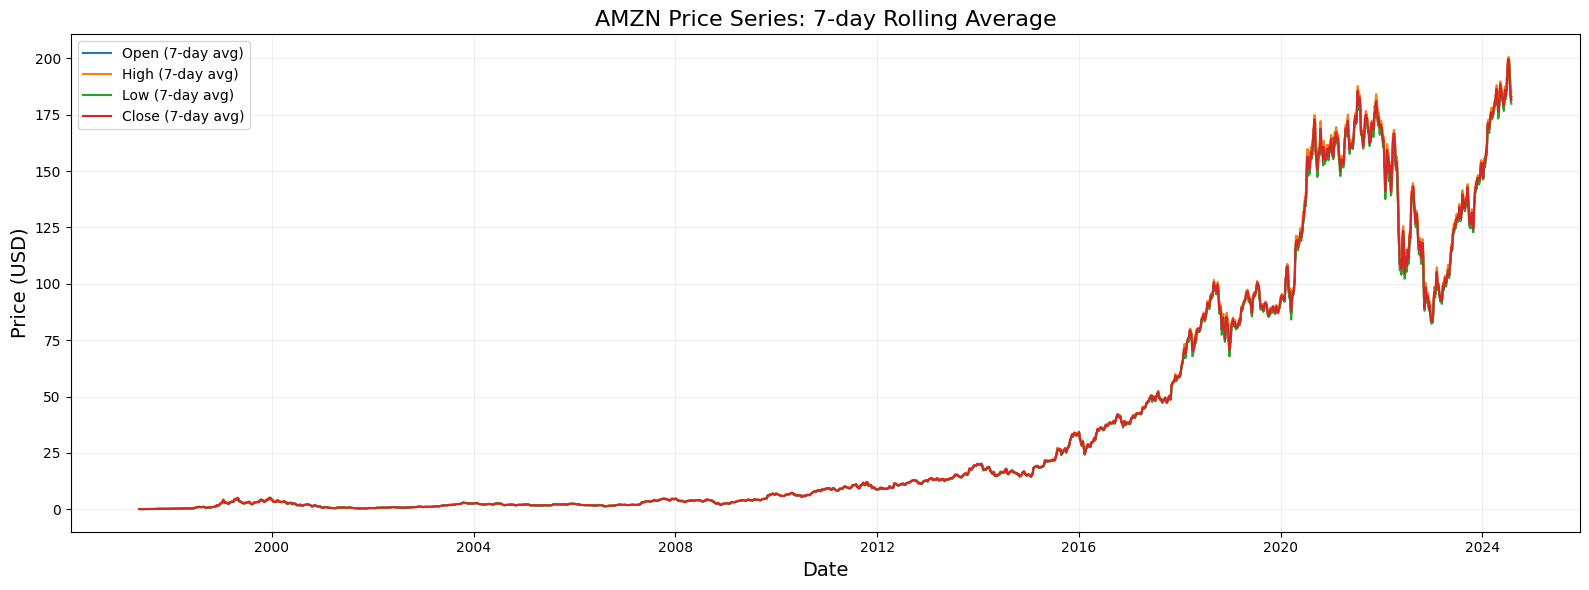

In [10]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_amzn, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("AMZN Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


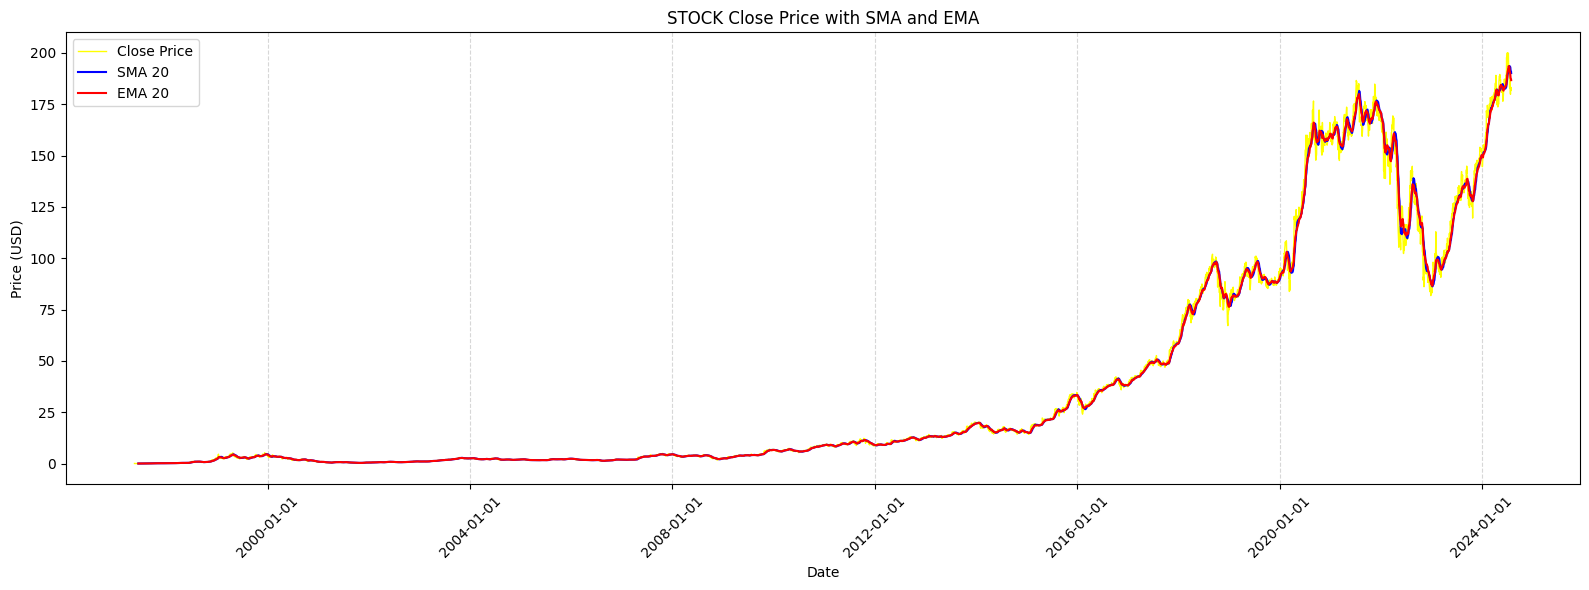

In [11]:
from src.plot_ma import plot_ma
plot_ma(df_amzn, 'Close')

## 📈 Close Price with SMA (Simple Moving Average) & EMA (Exponential Moving Average) — Analysis

This chart shows the stock’s closing price (yellow), alongside its **20-period SMA (blue)** and **20-period EMA (red)**, spanning decades.

---

### 🔵 What is the SMA?
- **Simple Moving Average (SMA 20):**
  - Averages the closing price over the last 20 periods (days, weeks, etc.).
  - Smooths out short-term fluctuations, revealing the broader trend.
  - Lags behind price—treats each day equally, so slower to respond to sudden changes.

---

### 🔴 What is the EMA?
- **Exponential Moving Average (EMA 20):**
  - Similar to SMA, but gives more weight to recent prices.
  - Reacts faster to price changes and trend reversals.
  - Especially useful for identifying early shifts in momentum.

---

### 🧠 How to Read the Chart

#### 1. **Trend Direction & Confirmation**
- Both SMA and EMA generally move upward in bull markets and downward in bear markets.
- In strong trends, price stays above both averages (bullish), while in corrections, it dips below (bearish).

#### 2. **SMA vs. EMA: Reactivity**
- The **EMA (red)** hugs the price more closely, especially during rapid moves—highlighting its responsiveness.
- The **SMA (blue)** is smoother, often providing a “truer” long-term average.

#### 3. **Crossovers: Signals to Watch**
- **Bullish signal:** When price crosses above both SMA and EMA—trend may be turning up.
- **Bearish signal:** When price drops below both averages—trend may be reversing down.
- Occasionally, EMA may cross SMA, adding a layer of signal (not visible here with just 20-period overlays).

#### 4. **Support & Resistance**
- Both lines often act as **dynamic support** in uptrends and **resistance** in downtrends. Price “bounces” from the moving averages during pullbacks.

---

### 💡 Key Takeaways

- **EMA is ideal for short-term traders** looking to react quickly to price changes.
- **SMA provides a steadier view** for long-term investors, filtering out more noise.
- **Best practice:** Combine moving averages with volume, RSI, or MACD for confirmation before making trading decisions.

---

> **Summary:**  
> This chart demonstrates how moving averages help traders and investors smooth price action, spot trends, and make better entry/exit decisions. The EMA’s sensitivity offers an early warning, while the SMA’s stability supports big-picture strategy.


c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_ma.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'SMA_{sma_period}'] = talib.SMA(df[price_col], timeperiod=sma_period)
c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_ma.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'EMA_{ema_period}'] = talib.EMA(df[price_col], timeperiod=ema_period)


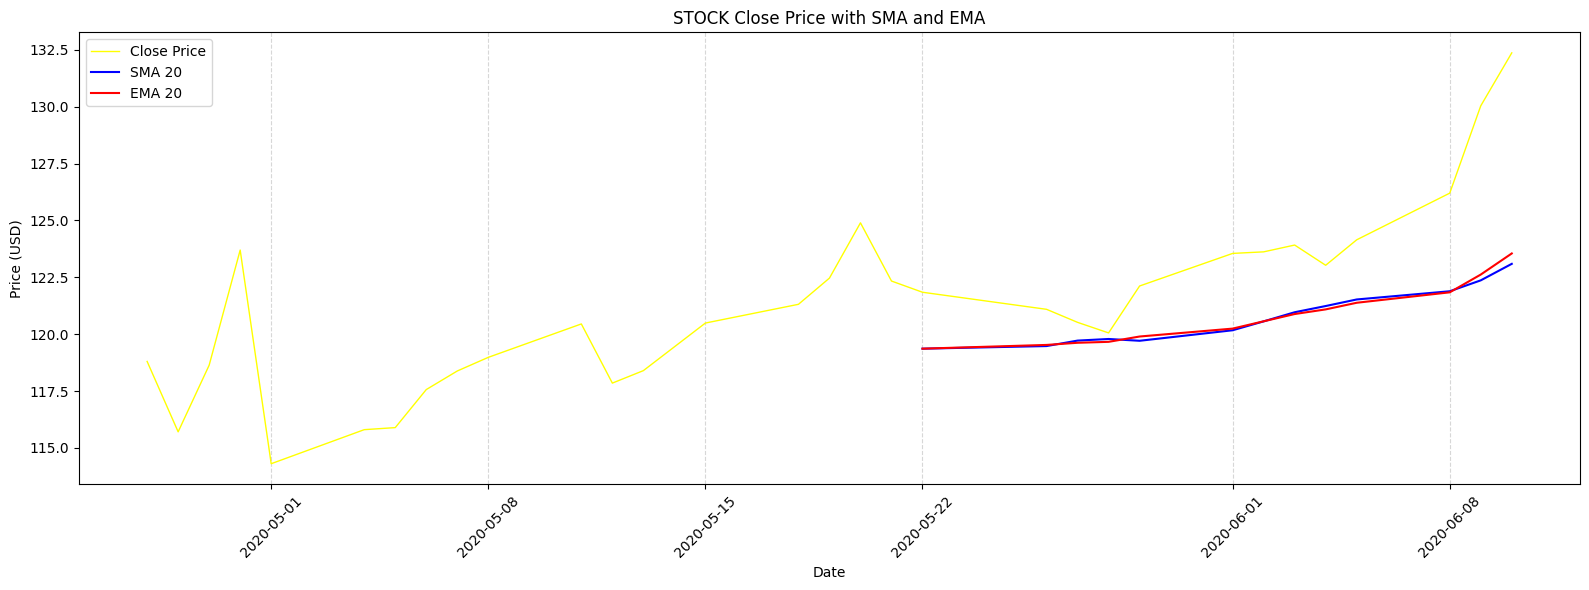

In [12]:
from src.plot_ma import plot_ma
plot_ma(df_amzn_news, 'Close')

## Interpreting Technical Indicators with TA-Lib: SMA, EMA, and Price Trend

The graph above overlays three key lines for AMZN stock:
- **Close Price** (black): The actual market closing price of AMZN for each trading day.
- **SMA 20** (blue): The 20-day Simple Moving Average, which calculates the unweighted average of the previous 20 closing prices for each point in time.
- **EMA 20** (red): The 20-day Exponential Moving Average, which is similar to the SMA but gives more weight to recent prices, making it more responsive to new market information.

**TA-Lib** is a widely-used library for financial technical analysis. It computes indicators like SMA and EMA, which traders and analysts use to understand price trends, identify potential buy or sell signals, and smooth out short-term volatility in market data.

##### Both the SMA and EMA are trending up, confirming a bullish trend.

The lines stay in order: yellow (price) > red (EMA) > blue (SMA), a classic sign of a strong and established uptrend.

**Signals:**
When the price crosses above the moving averages, it’s often seen as a “buy” signal.
When it’s below, it’s a “sell” signal.

**Momentum:**
The bigger the gap between the yellow line and the moving averages, the stronger the trend (but sometimes this can mean the stock is “overbought” and may pull back soon).


### Key Insights from the Plot:
1. Early Part (Start of Chart)
The yellow line (price) is a bit volatile, going up and down, but overall it’s near the 115–120 USD range.

There's a sharp drop and rebound in early May, showing some market “jitters.”

2. Middle Part (Mid-May)
After a quick dip, the price starts rising steadily.

SMA and EMA begin to slope upward as the price rises, but the price stays above both moving averages, confirming a developing uptrend.

3. Late Part (June)
The price continues to rise sharply, ending above 130 USD.

Both SMA (blue) and EMA (red) lines follow the price up, but EMA (red) stays a little closer to the price, showing its faster response to changes.

The gap between the price and the moving averages widens at the end, showing strong momentum.

What Does This Mean for Analysis?
Uptrend Confirmation:

When the price is above both the SMA and EMA, the trend is strong and upward (bullish).

EMA Reacts Faster:

EMA (red) turns up slightly before SMA, and stays closer to the rising price — useful for early trend detection.

Momentum Signal:

The bigger the gap between the price and the averages, the stronger the trend (but sometimes a warning it’s getting “too hot” and could slow down soon).

Volatility Early, Strength Later:

Early volatility settles into a smooth, strong uptrend by June.




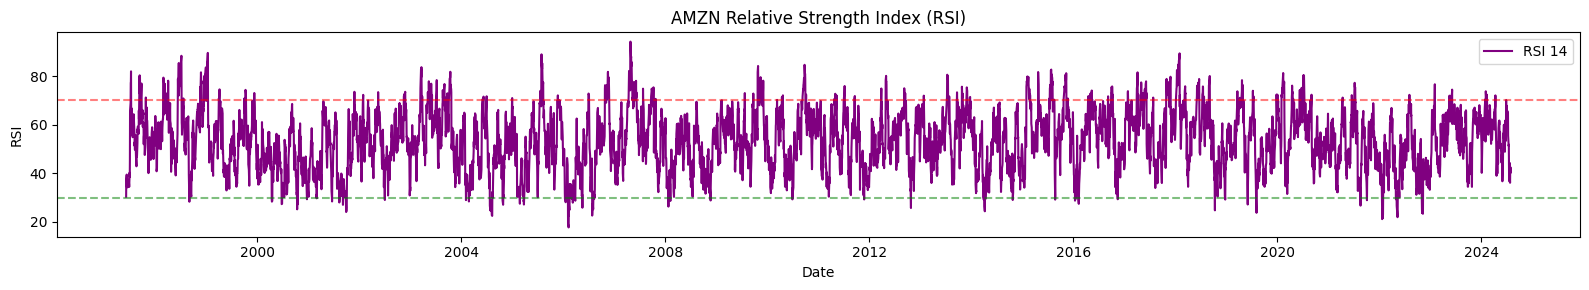

In [15]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_amzn, price_col='Close', ticker_name='AMZN')

## 🟣 AMZN Relative Strength Index (RSI) Analysis

This chart tracks Amazon’s (AMZN) 14-period RSI, offering insight into the stock’s momentum swings from the late 1990s through 2024.

---

### 📏 Key Levels
- **70 (Red dashed line):**  
  - *Overbought* threshold.  
  - RSI above 70 may indicate AMZN is short-term overbought—potential for a pause or pullback.
- **30 (Green dashed line):**  
  - *Oversold* threshold.  
  - RSI below 30 can signal AMZN is oversold—potential for a rebound or rally.

---

### 🕵️‍♂️ How to Read This RSI Chart

1. **Momentum Oscillation**
   - The RSI swings frequently between 30 and 70, reflecting the dynamic nature of AMZN’s price action.
   - Multiple spikes above 70 and drops below 30 show how often AMZN hits periods of extreme optimism and pessimism.

2. **Overbought Episodes (RSI > 70)**
   - Periods when the line spikes above the red dashed line usually coincide with price surges.
   - Not all overbought readings are followed by reversals—sometimes, AMZN continues to run higher, especially in bull markets.

3. **Oversold Episodes (RSI < 30)**
   - Drops below the green line typically mark panic selling or profit-taking phases.
   - These often (but not always) present buying opportunities, especially if fundamentals remain strong.

4. **Mean Reversion**
   - Notice how quickly RSI returns to the midline (around 50), emphasizing that momentum extremes are usually short-lived.

5. **Historical Perspective**
   - AMZN’s RSI has shown both more frequent and sharper swings in earlier years, suggesting higher volatility in the company’s early days.  
   - In more recent years, the swings, while still present, appear somewhat less extreme—a sign of AMZN maturing as a mega-cap company.

---

### 💡 Key Takeaways

- **For traders:** Watch for RSI extremes as *potential* entry/exit points—but always look for confirmation.
- **For long-term investors:** Oversold RSI readings can highlight rare buy-the-dip opportunities in a growth giant like AMZN.
- **Best practice:** Combine RSI with trend indicators (SMA/EMA) or volume for stronger, more reliable signals.

---

> **Summary:**  
> The RSI offers a window into Amazon’s emotional price swings—flagging overbought and oversold periods. For AMZN, momentum can shift quickly, so use RSI as an alert, not a guarantee, and always trade with context!


c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_rsi.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[rsi_col] = talib.RSI(df[price_col], timeperiod=rsi_period)


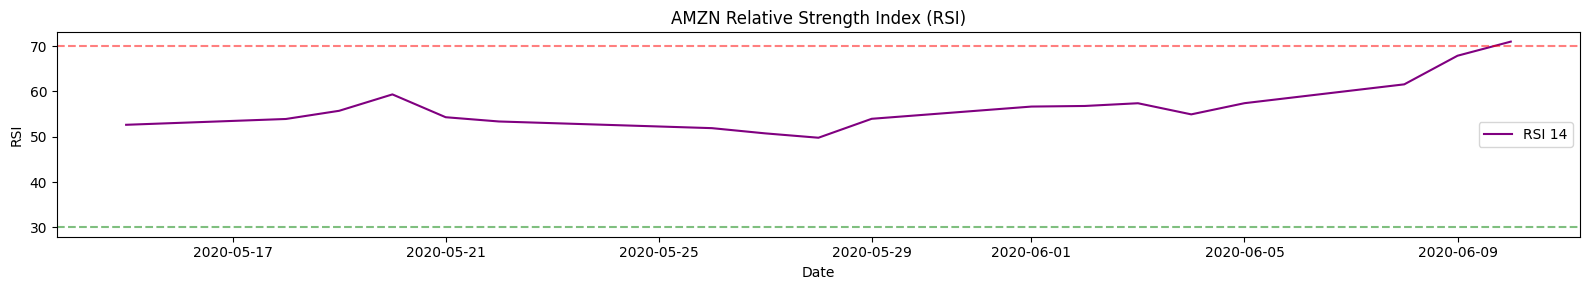

In [13]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_amzn_news, price_col='Close', ticker_name='AMZN')

## Interpreting the Relative Strength Index (RSI) with TA-Lib

The graph above visualizes the **14-day Relative Strength Index (RSI)** for AMZN, a momentum oscillator computed by TA-Lib. RSI is a popular indicator used by traders to measure the speed and magnitude of recent price changes.

- **RSI 14 (purple line):** This shows the relative strength over a 14-day period, ranging from 0 to 100.
- **Overbought threshold (red dashed line at 70):** When the RSI is above 70, it signals that the stock may be overbought or overvalued, and a price correction or pullback could be imminent.
- **Oversold threshold (green dashed line at 30):** When the RSI is below 30, it suggests that the stock may be oversold or undervalued, indicating a possible rebound or buying opportunity.

### Key Insights from the RSI Plot:

**Most of the period:**
RSI is between 50 and 60, meaning the stock is not overbought or oversold—just moving along in a healthy trend.

**End of the period:**
RSI climbs sharply and breaks above 70.

**This is a classic sign the stock is overbought** — it’s been gaining fast and could be due for a slowdown, sideways movement, or even a small pullback.

Doesn’t mean the stock must crash, but after hitting >70, **caution is wise** especially if you see other signals (like MACD or news sentiment) saying the same thing.





c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


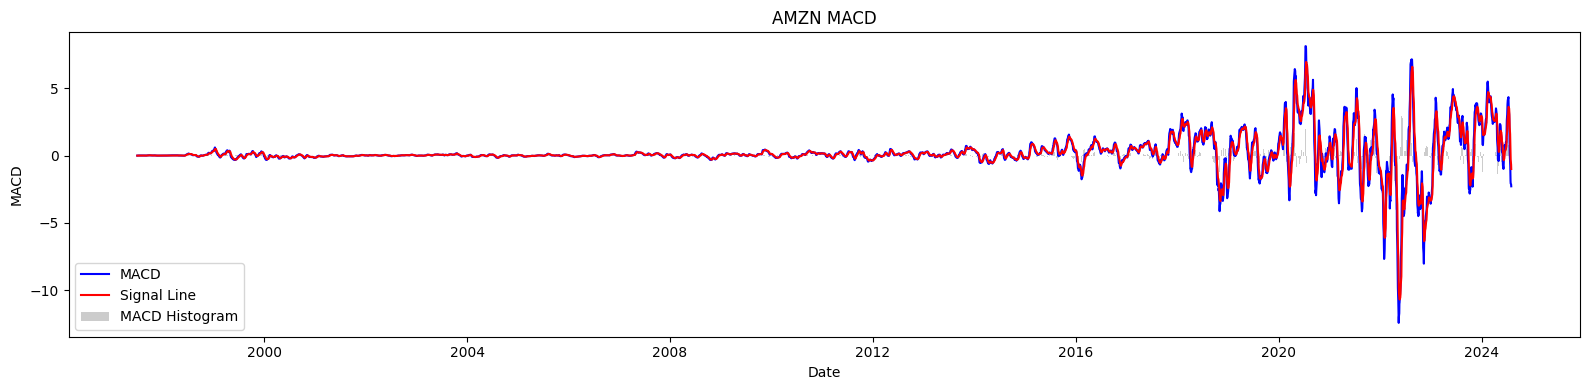

In [16]:
from src.plot_macd import plot_macd

# For Apple with Close price
plot_macd(df_amzn, price_col='Close', ticker_name='AMZN')

## Interpreting the MACD Indicator with TA-Lib
What is MACD?
MACD (Moving Average Convergence Divergence) is a technical indicator used to spot trends and momentum in a stock’s price.

The chart has:

Blue line: The MACD value itself (difference between two moving averages of price)

Red line: The Signal Line (a moving average of the MACD)

Gray bars: The MACD Histogram (shows the difference between MACD and Signal Line; bigger bars = bigger momentum)

What Does Your Chart Show?
1. April–Early May
MACD and Signal Line both start high but begin to drop.

MACD (blue) is below the Signal Line (red) most of the time—bearish signal (price momentum is downward).

The MACD Histogram bars are mostly below zero (gray bars under the middle line), which confirms the weak/downward trend.

2. Mid–Late May
Both lines keep dropping, showing the stock is still losing momentum.

When the MACD gets closer to the Signal Line (the lines almost touch), the histogram bars get closer to zero—trend is slowing, possibly about to change.

3. Early June
MACD (blue) line starts to turn up just a bit, nearing the Signal Line.

Histogram bars flip from negative toward zero and even go slightly positive at the end, hinting momentum might be shifting upward.